In [1]:
# coding: utf-8
# In[1]:
#библиотека requests, с помощью которой можно делать HTTP-запросы в API hh.ru.
#API - набор готовых классов, процедур, функций, структур и констант, предоставляемых приложением (библиотекой, сервисом) 
#или операционной системой для использования во внешних программных продуктах. 
#Используется программистами при написании всевозможных приложений.
import requests
# matplotlib — это библиотека Python для построения качественных двухмерных графиков
import matplotlib.pyplot as plt

In [2]:
# In[2]:
#скачивание 1000 последних объявлений с hh.ru
arr1 = []
#range - универсальная функция для создания списков (list), содержащая арифметическую прогрессию
#принимает от 1 до 3 аргументов
for i in range(10):
    #print(i)
    str0 = 'https://api.hh.ru/vacancies/?per_page=100&page='+str(i)+'&text=machine+learning+OR+big+data+OR+data+science+OR+data+analytics'
    #print(str0)
    req0 = requests.get(str0)
    #if req0.status_code != requests.codes.ok:
        #print("Error: server return status code: " + str(req.status_code))
    arr1 += (req0.json()['items'])
print(arr1)
#len(arr2)

[{'salary': None, 'snippet': {'requirement': '...<highlighttext>big</highlighttext> network. You are experienced in solving problems using <highlighttext>machine</highlighttext> <highlighttext>learning</highlighttext> techniques (clustering, classification, outlier analysis, etc) and deep <highlighttext>learning</highlighttext>...', 'responsibility': '...<highlighttext>data</highlighttext> models, to identify inconsistencies in <highlighttext>data</highlighttext>. You will come up with scalable algorithms (for <highlighttext>data</highlighttext> processing and <highlighttext>machine</highlighttext> <highlighttext>learning</highlighttext>...'}, 'archived': False, 'premium': False, 'name': 'Senior Data Science Engineer', 'area': {'url': 'https://api.hh.ru/areas/1', 'id': '1', 'name': 'Москва'}, 'url': 'https://api.hh.ru/vacancies/25075401?host=hh.ru', 'created_at': '2018-04-15T20:13:07+0300', 'alternate_url': 'https://hh.ru/vacancy/25075401', 'apply_alternate_url': 'https://hh.ru/applica

In [3]:
# In[3]:
#получение значений зарплат + перевод валюты
#в случае четного числа зарплат берется полусумма двух средних
#в случае нечетного нужно отсортировать и взять зарплату со средним номером
vac_sal = {} #словарь - структура данных, отображающая одни объекты (ключи) в другие (значения)
for i in arr1:
    if ((i['salary'] != None) and (i['salary']['currency'] == 'RUR')): #валюта - рубли
        if i['salary']['to'] == None:
            vac_sal[i['name']] = (i['salary']['from']) 
        elif i['salary']['from'] == None:
            vac_sal[i['name']] = (i['salary']['to']/2)           
        elif ((i['salary']['from'] != None) and (i['salary']['to'] != None)):
            vac_sal[i['name']] = ((i['salary']['to'] + i['salary']['from']) / 2)
            
    elif ((i['salary'] != None) and (i['salary']['currency'] == 'USD')): #валюта - доллары
        if i['salary']['to'] == None:
            vac_sal[i['name']] = (i['salary']['from'] * 57) 
        elif i['salary']['from'] == None:
            vac_sal[i['name']] = ((i['salary']['to'] / 2) * 57)           
        elif ((i['salary']['from'] != None) and (i['salary']['to'] != None)):
            vac_sal[i['name']] = (i['salary']['to'] + i['salary']['from'] / 2) * 57 
            
    elif   ((i['salary'] != None) and (i['salary']['currency'] == 'EUR')): #валюта - евро
        if i['salary']['to'] == None:
            vac_sal[i['name']] = (i['salary']['from'] * 71) 
        elif i['salary']['from'] == None:
            vac_sal[i['name']] = ((i['salary']['to'] / 2) * 71)           
        elif ((i['salary']['from'] != None) and (i['salary']['to'] != None)):
            vac_sal[i['name']] = (i['salary']['to'] + i['salary']['from'] / 2) * 71      
vac_sal

{'AI / Machine Learning Engineer': 110000,
 'AI Machine Learning Engineer': 130000,
 'Account Manager (digital) со знанием английского языка': 100000,
 'Back-end веб-разработчик PHP/MySQL': 30000,
 'Big Data Developer': 205000.0,
 'Business Analyst': 69000.0,
 'Business Development Manager / Sales Manager': 50000,
 'C# (.NET) Chief Software Architect': 684000.0,
 'C# (.NET) Software Architect': 413250.0,
 'C++ Software Developer': 100000,
 'Chief Financial Officer (CFO)': 355000,
 'Chief Software Architect': 684000.0,
 'Cloud Chief Software Architect': 684000.0,
 'Computer Vision (Go/C++)': 60000.0,
 'Customer analytic Specialist': 55000,
 'Data Collection Specialist (специалист по сбору данных)': 35000.0,
 'Data Engineer': 195000.0,
 'Data Engineer (Deep learning, Machine Learning)': 130000,
 'Data Engineer for Deep Learning': 57000.0,
 'Data Manager': 95000.0,
 'Data Science Engineer': 150000,
 'Data Science Team Leader (г.Санкт-Петербург)': 200000,
 'Data Science Team Leader (г.Санк

In [4]:
# In[4]:
#сортировка и поиск медианы для data_science
data_science = []
for i  in vac_sal:
    if (('ata' in i) and ('cien' in i)):
        data_science.append(vac_sal[i])
data_science.sort() 
print(data_science)
med_ds = (data_science[len(data_science)//2])
print('медиана=', med_ds)

[35000.0, 50000, 85000.0, 90000.0, 100000.0, 100000.0, 100000, 100000.0, 105000.0, 120000, 128250.0, 130000, 142000.0, 142500, 150000, 150000, 150000, 160000, 171000, 175000.0, 200000, 200000, 200000, 200000, 233700.0, 300000, 300000, 712500.0]
медиана= 150000


In [5]:
# In[5]:
#сортировка и поиск медианы для machine_learning
machine_learning = []
for i  in vac_sal:
    if (('achine' in i) or ('earning' in i)):
        machine_learning.append(vac_sal[i])
machine_learning.sort() 
print(machine_learning)
med_ml = (machine_learning[len(machine_learning)//2])
print('медиана=', med_ml)

[35000.0, 57000.0, 85000.0, 110000, 115000.0, 120000, 125000, 130000, 130000, 199500.0, 200000, 300000]
медиана= 125000


In [6]:
# In[6]:
#сортировка и поиск медианы для programmer
programmer = list()
for i  in vac_sal:
    if ('рограммист' in i):
        programmer.append(vac_sal[i])
programmer.sort() 
print(programmer)
med_prg = (programmer[len(programmer)//2])
print('медиана=', med_prg)

[35000.0, 35000.0, 50000, 55000.0, 57500.0, 70000.0, 75000.0, 80000.0, 80000, 85000.0, 92500.0, 100000.0, 110000.0, 110000.0, 115000.0, 125000, 125000.0, 173850.0, 199500.0]
медиана= 85000.0


In [7]:
# In[7]:
#сортировка и поиск медианы для analyst
analyst = list()
for i  in vac_sal:
     if (('нали' in i) or ('naly' in i)) :
        analyst.append(vac_sal[i])
analyst.sort() 
print(analyst)
med_anl = (analyst[len(analyst)//2])
print('медиана=', med_anl)

[42500.0, 55000, 55000, 55000.0, 69000.0, 70000, 70000, 80000, 80000.0, 90000.0, 100000.0, 100000, 105000.0, 120000, 120000, 142000.0, 175000.0, 185000.0, 256500.0]
медиана= 90000.0


In [8]:
# In[8]:
#сортировка и поиск медианы для developer
developer = list()
for i  in vac_sal:
     if (('азработ' in i)or ('evelop' in i)) :
        developer.append(vac_sal[i])
developer.sort() 
print(developer)
med_dvp = (developer[len(developer)//2])
print('медиана=', med_dvp)

[30000, 35000.0, 50000, 50000, 55000, 57500.0, 60000.0, 75000.0, 75000.0, 85000.0, 100000.0, 100000.0, 100000, 110000.0, 110000.0, 115000.0, 120000.0, 125000, 130000.0, 130000.0, 140000.0, 142500, 150000, 160000, 160000, 171000, 171000, 173850.0, 175000.0, 180000.0, 200000, 205000.0, 210000, 228000.0, 233700.0, 285000, 355000, 712500.0]
медиана= 130000.0


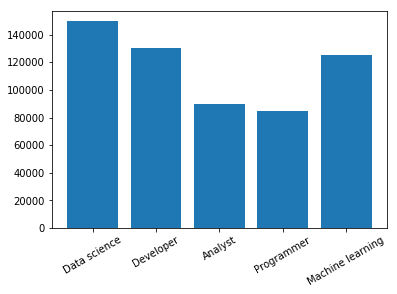

In [9]:
# In[9]:
#для графика - присваивание номеров
names = ['Data science', 'Developer', 'Analyst', 'Programmer', 'Machine learning']
x = [0, 1, 2, 3, 4]
med = [med_ds, med_dvp, med_anl, med_prg, med_ml]
plt.bar(x, med)
plt.xticks(x, names, rotation = 30)
plt.show()

In [10]:
# In[10]:
#распределение зарплат по диапазонам
a = 0
b = 0
c = 0
d = 0
e = 0
f = 0
print(len(vac_sal))
for i  in vac_sal:
    if (vac_sal[i] < 80000):
        a += 1
    elif ((vac_sal[i] >= 80000) and (vac_sal[i] < 120000)):
        b += 1
    elif ((vac_sal[i] >= 120000) and (vac_sal[i] < 150000)):
        c += 1  
    elif ((vac_sal[i] >= 150000) and (vac_sal[i] < 200000)):
        d += 1
    elif ((vac_sal[i] >= 200000) and (vac_sal[i] < 300000)):
        e += 1    
    elif (vac_sal[i] >= 300000):
        f += 1
print(a , b, c, d, e, f)

143
37 34 17 28 15 12


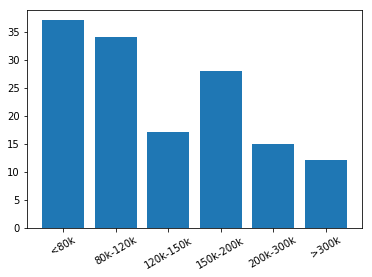

In [12]:
# In[11]:
#присваивание номеров зарплатам
names2 = ['<80k', '80k-120k', '120k-150k', '150k-200k', '200k-300k', '>300k']
x2 = [0, 1, 2, 3, 4, 5]
count = [a, b, c, d, e, f]
plt.bar(x2, count)
plt.xticks(x2, names2, rotation = 30)
plt.show()